
<h1><center>DCM Tutorial</h1></center>

This is a basic example of how to use the DNS clustering module (DCM).

In [1]:
import pandas as pd
import os
import dcm
import math

%matplotlib inline

path="F:\\Masters degree\\Capstone Project\\data"
os.chdir(path)

dns_headings = ['time','source_computer','computer_resolved']
dns = pd.read_csv('dns.txt', sep=',', header=None, names=dns_headings)

First we will cluster the entire dataset using only the total number of connections for the top 50 resolved computers.

The result is in the form of a dictionary containing a single key: 'Window_1'. The corresponding value is a list of the top 50 resolved computers, along with the clustering results.

In [3]:
cluster_all_data=dcm.SlidingWindow(dns)
top50_resolved_computers, clustering_results=cluster_all_data['Window_1']

From the clustering results, we can obtain the cluster labels for each of the listed computers, in addition to the cluster centers.

In [5]:
print("Top 10 resolved computers:")
print(top50_resolved_computers[0:10])

labels=clustering_results.labels_
print("Labels:")
print(labels[0:10])

cluster_centers=clustering_results.cluster_centers_
print("Cluster centers:")
print(cluster_centers)

Top 10 resolved computers:
40     C586
7     C1707
6     C1685
29    C5030
47     C754
1     C1025
45     C706
2     C1065
14    C2189
27     C457
Name: computer_resolved, dtype: object
Labels:
[1 1 1 1 2 2 2 2 2 2]
Cluster centers:
[[-0.53554605]
 [ 2.82316459]
 [ 0.57632562]]


By playing with window_size and stride, we can choose instead to cluster disjoint subsets of the data, or overlapping subsets of the data.

The data timestamps range from 0 to 5011199. 5011199 is also the default window size. Hence the default settings (above) result in a single window - essentially performing a single cluster analysis over the entire range of time. To do an analysis on 2 equally sized, disjoint sets of the data (i.e. we split the data in half and cluster each portion), set window_size=floor(5011199/2) and set stride=floor(5011199/2). You need to manually determine the values of window_size and stride yourself, depending on the result you want.

In [4]:
cluster_all_data=dcm.SlidingWindow(dns, window_size=math.floor(5011199/2), stride=math.floor(5011199/2))

The result is a dictionary that now has two keys: 'Window_1' and 'Window_2'. The values of these keys are in the same format as the previous example.

In [3]:
window_1_resolved_computers, window_1_cluster_results=cluster_all_data['Window_1']

print("Top 10 resolved computers for window 1:")
print(window_1_resolved_computers[0:10])

window_1_labels=window_1_cluster_results.labels_
print("Labels:")
print(window_1_labels[0:10])

window_1_cluster_centers=window_1_cluster_results.cluster_centers_
print("Cluster centers:")
print(window_1_cluster_centers)


Top 10 resolved computers for window 1:
46     C706
5     C1685
7     C1707
28    C5030
41     C586
3     C1065
26     C457
30     C528
27     C467
31     C529
Name: computer_resolved, dtype: object
Labels:
[1 1 1 1 1 2 2 2 2 2]
Cluster centers:
[[-0.476392  ]
 [ 2.72032766]
 [ 0.39427485]]


In [5]:
window_2_resolved_computers, window_2_cluster_results=cluster_all_data['Window_2']

print("Top 10 resolved computers for window 2:")
print(window_2_resolved_computers[0:10])

window_2_labels=window_2_cluster_results.labels_
print("Labels:")
print(window_2_labels[0:10])

window_2_cluster_centers=window_2_cluster_results.cluster_centers_
print("Cluster centers:")
print(window_2_cluster_centers)

Top 10 resolved computers for window 2:
40     C586
28    C5030
6     C1707
5     C1685
47     C754
1     C1025
45     C706
13    C2189
2     C1065
26     C457
Name: computer_resolved, dtype: object
Labels:
[1 1 1 1 1 1 2 2 2 2]
Cluster centers:
[[-0.57009701]
 [ 2.4432564 ]
 [ 0.2318053 ]]


As can be seen, there is some difference between the clusters. (Why?)

In the final example, we will split the data into three <i>overlapping</i> windows using window_size=floor(5011199/2) and stride=floor(5011199/4).

In [2]:
cluster_all_data=dcm.SlidingWindow(dns, window_size=math.floor(5011199/2), stride=math.floor(5011199/4))

We should now have a dictionary containing three keys: 'Window_1', 'Window_2' and 'Window_3'. The results can be viewed in the same way as in the previous examples.

In [4]:
window_1_resolved_computers, window_1_cluster_results=cluster_all_data['Window_1']

print("Top 10 resolved computers for window 1:")
print(window_1_resolved_computers[0:10])

window_1_labels=window_1_cluster_results.labels_
print("Labels:")
print(window_1_labels[0:10])

window_1_cluster_centers=window_1_cluster_results.cluster_centers_
print("Cluster centers:")
print(window_1_cluster_centers)

Top 10 resolved computers for window 1:
46     C706
5     C1685
7     C1707
28    C5030
41     C586
3     C1065
26     C457
30     C528
27     C467
31     C529
Name: computer_resolved, dtype: object
Labels:
[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Cluster centers:
[[-0.476392  ]
 [ 2.72032766]
 [ 0.39427485]]


In [5]:
window_2_resolved_computers, window_2_cluster_results=cluster_all_data['Window_2']

print("Top 10 resolved computers for window 2:")
print(window_2_resolved_computers[0:10])

window_2_labels=window_2_cluster_results.labels_
print("Labels:")
print(window_2_labels[0:10])

window_2_cluster_centers=window_2_cluster_results.cluster_centers_
print("Cluster centers:")
print(window_2_cluster_centers)

Top 10 resolved computers for window 2:
40     C586
8     C1707
6     C1685
28    C5030
45     C706
1     C1025
47     C754
14    C2189
2     C1065
30     C528
Name: computer_resolved, dtype: object
Labels:
[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Cluster centers:
[[ 0.41481157]
 [-0.54907453]
 [ 2.62834412]]


In [6]:
window_3_resolved_computers, window_3_cluster_results=cluster_all_data['Window_3']

print("Top 10 resolved computers for window 3:")
print(window_3_resolved_computers[0:10])

window_3_labels=window_3_cluster_results.labels_
print("Labels:")
print(window_3_labels[0:10])

window_3_cluster_centers=window_3_cluster_results.cluster_centers_
print("Cluster centers:")
print(window_3_cluster_centers)

Top 10 resolved computers for window 3:
40     C586
28    C5030
6     C1707
5     C1685
47     C754
1     C1025
45     C706
13    C2189
2     C1065
26     C457
Name: computer_resolved, dtype: object
Labels:
[2, 2, 2, 2, 2, 2, 1, 1, 1, 1]
Cluster centers:
[[ 0.23180533]
 [-0.570097  ]
 [ 2.44325628]]


In [3]:
cluster_all_data=dcm.ProcessResults(cluster_all_data)

In [17]:
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import pyplot

def PlotClusterChanges2(membership_df):
    
    new_array=[]

    # Filter out static desktops
    for i in range(0,np.shape(membership_df)[0]):
        
        if sum(list(membership_df.iloc[i,1:]))>0:
            
            test=membership_df.iloc[i,1:]
            
            new_array.append(list(test))    

    data = new_array
    
    rows=np.shape(data)[0]
    columns=np.shape(data)[1]

    # create discrete colormap
    cmap = colors.ListedColormap(['red', 'blue', 'green'])
    bounds = [-0.001,0.001,1.001,2.001]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(data, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(True)
    ax.set_xticks();
    ax.set_yticks(np.arange(0, rows, 1));

    plt.show()
    
    return

Populating the interactive namespace from numpy and matplotlib


C:\Users\Greg\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


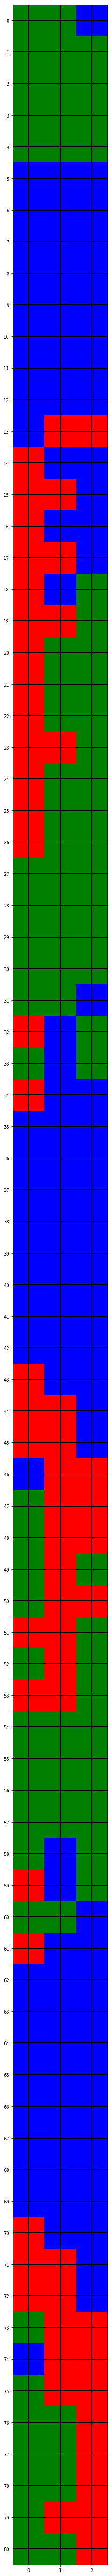

In [18]:
%pylab inline
pylab.rcParams['figure.figsize'] = (100, 100)

cluster_df=dcm.TrackClusterMembership(cluster_all_data)
dcm.PlotClusterChanges2(cluster_df)

That concludes the tutorial. Thank you for reading! Here are some ideas for where to go next:

1) Try using more statistical features by setting use_extended_features=True for dcm.SlidingWindow.<BR>
2) See if computers move in and out of clusters depending on the time (hint: think about it in terms of moving from a larger cluster to a smaller one, or vice versa, as the cluster numbers change from window to window).<BR>
3) Use a different form of clustering.<BR>
4) Explore the dcm.py file and possibly add a new function to perform a different type of analysis on the sliding windows.<BR>